# 의사록 불러오기

In [10]:
import pandas as pd
import re

In [2]:
mpb = pd.read_pickle('mpb_all.pkl')

In [3]:
# 날짜 형식 바꾸기
mpb['date'] =pd.to_datetime(mpb.date)

In [4]:
mpb.head()

,date,body,ngram
0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"[[fed/NNG;금리/NNG;인상/NNG, 견조/NNG;회복/NNG, 플래트닝/N..."
1,2017-10-19,일부 위원은 최근 미국에서는 임금상승세가 확대되고 세제개혁에 대한 기대 감이 커지...,"[[임금/NNG;상승/NNG;확대/NNG, 기대/NNG;크/VV], [대차대조표/N..."
2,2017-08-31,일부 위원은 미국의 금리 정상화 행보에도 불구하고 미 달러화가 약세기조를 지속하면...,"[[국제/NNG;원자재/NNG;가격/NNG;상승/NNG, 금리/NNG;하락/NNG;..."
3,2017-07-13,일부 위원은 주요국에서는 성장과 고용이 회복국면의 정점을 향해 가고 있음.에도 불구...,"[[성장/NNG], [하회/NNG], [국제/NNG;금융시장/NNG;변동성/NNG;..."
4,2017-05-25,일부 위원은 최근 국제금융시장이 안정된 모습을 지속하는 가운데 국내금융 시장도 외...,"[[외국인/NNG;증권/NNG;투자자금/NNG;유입/NNG;확대/NNG, 국제/NN..."


In [5]:
mpb.to_pickle('mpb_final.pkl')
mpb.to_csv('mpb_final.csv')

In [6]:
# 의사록 문장별 토큰화

In [7]:
mpb = pd.read_pickle('mpb_final.pkl')

In [11]:
def tidy_sentences(section):
    sentence_enders = re.compile(r'((?<=[함음됨임봄짐움])(\s*\n|\.|;)|(?<=다)\.)\s*')
    splits = list((m.start(), m.end()) for m in re.finditer(sentence_enders, section))
    starts = [0] + [i[1] for i in splits]
    ends = [i[0] for i in splits]
    sentences = [section[start:end] for start, end in zip(starts[:-1], ends)]
    for i, s in enumerate(sentences):
        sentences[i] = (s.replace('\n', ' ').replace(' ', ' ')) + '.'

    text = '\n'.join(sentences) if len(sentences) > 0 else ''
    return sentences, text

In [12]:
temp = mpb['body']
date = mpb['date']
split = []

new = {}

for idx, body in enumerate(temp):
    splited_s, _ = tidy_sentences(body)
    for j in splited_s:
        split.append([date[idx], j])

In [13]:
df = pd.DataFrame(split)
df.columns = ['date', 'body']

In [14]:
import pandas as pd
from tqdm import tqdm
from ekonlpy.sentiment import MPCK
mpck = MPCK()

ngram_list=[]
for i in tqdm(range(len(df['body']))):
    try:
        sent_ngram=[]
        sent=df['body'][i]
        ngrams = mpck.ngramize(mpck.tokenize(sent),keep_overlapping_ngram=False)
        
        if ngrams:
            sent_ngram.append(ngrams)
        ngram_list.append(sent_ngram)
    except:
        print(i)
df['ngram']=ngram_list

100%|██████████████████████████████████████████████████████████████████████████████| 5146/5146 [01:23<00:00, 61.50it/s]


In [20]:
# 괄호, 공백 삭제하기
tem = df['ngram']
tem = [re.sub('[\[\]\']', '', str(i)) for i in tem]
tem = [re.sub(' ', '', i) for i in tem]
df['ngram'] = tem
df.head()

,date,body,ngram
0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"fed/NNG;금리/NNG;인상/NNG,견조/NNG;회복/NNG,플래트닝/NNG"
1,2017-11-30,일각에서는 미국의 장기실 질균형금리 및 기대인플레이션의 하락을 그 원인으로 거론하...,기대/NNG;인플레이션/NNG;하락/NNG
2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG
3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물..."
4,2017-11-30,이에 동 위원은 미국의 세제개편안이 의회를 통과한다면 수익률곡선이나 정 책금리 경...,인하/NNG


In [22]:
idx_del = df[df['ngram'] == ''].index
idx_del

Int64Index([   9,   21,   23,   24,   25,   32,   42,   43,   47,   49,
            ...
            5107, 5108, 5111, 5113, 5114, 5115, 5118, 5120, 5136, 5144],
           dtype='int64', length=956)

In [23]:
df = df.drop(idx_del)
df.to_csv('mpb_split.csv')

# 사전 불러오기

In [19]:
dicts = pd.read_csv('FINAL_DICT.csv')
del dicts['Unnamed: 0']
dicts.head()

,ngram,비둘기파,매파,비둘기파prob,매파prob,polarityscore,label
0,콜/NNG;금리/NNG;인상/NNG,1479,1248,0.000653,0.001674,2.562239,1
1,비둘기/NNG,3816,955,0.001685,0.001281,0.760171,-1
2,인플레이션/NNG;우려/NNG,1628,742,0.000719,0.000996,1.384378,1
3,fed/NNG;금리/NNG;인하/NNG,1280,632,0.000565,0.000848,1.499778,1
4,통화/NNG;완화/NNG,2261,538,0.000999,0.000722,0.722995,-1


In [32]:
# 의사록 어조 라벨링

In [22]:
import pandas as pd
from collections import defaultdict

n_t_merge = pd.read_csv('mpb_split.csv')
dicts = pd.read_csv('FINAL_DICT.csv')

# 열 생성
n_t_merge['매파count'] = ""
n_t_merge['비둘기파count'] = ""

# 초기값
a_cnt = 0
b_cnt = 0

# 사전 dictionary로 형식변경
dic = defaultdict(lambda: 0)

for i, row in dicts.iterrows() :
    dic[row["ngram"]] = row["label"]

for i in range(len(n_t_merge)):
    n_t_dic = str(n_t_merge['ngram'][i]).split(',')

    for j in range(len(n_t_dic)):
        n_t = n_t_dic[j]
        
        if dic[n_t] == 1:
            a_cnt = a_cnt + 1
        elif dic[n_t] == -1:
            b_cnt = b_cnt + 1
        else:
            continue
            
    n_t_merge['매파count'][i] = a_cnt
    n_t_merge['비둘기파count'][i] = b_cnt
    a_cnt = 0
    b_cnt = 0

del n_t_merge['Unnamed: 0']
n_t_merge.head()

C:\Users\hyeryeon\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hyeryeon\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,body,ngram,매파count,비둘기파count
0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"fed/NNG;금리/NNG;인상/NNG,견조/NNG;회복/NNG,플래트닝/NNG",0,0
1,2017-11-30,일각에서는 미국의 장기실 질균형금리 및 기대인플레이션의 하락을 그 원인으로 거론하...,기대/NNG;인플레이션/NNG;하락/NNG,0,1
2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG,0,1
3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물...",1,0
4,2017-11-30,이에 동 위원은 미국의 세제개편안이 의회를 통과한다면 수익률곡선이나 정 책금리 경...,인하/NNG,0,0


In [23]:
n_t_merge.to_csv('의사록_매비count.csv', index = False)

In [24]:
#의사록 문장 어조 라벨링

n_t_merge = pd.read_csv('의사록_매비count.csv')
n_t_merge['tone_s']=''

for i in range(len(n_t_merge)):
    key1 = n_t_merge['매파count'][i]
    key2 = n_t_merge['비둘기파count'][i]
    
    if key1 != key2:
        
        subs = key1 - key2
        sums = key1 + key2

        n_t_merge['tone_s'][i] = subs / sums
        
    else:
        n_t_merge['tone_s'][i] = 0

C:\Users\hyeryeon\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hyeryeon\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [25]:
n_t_merge.sort_values(by='date').head()

,date,body,ngram,매파count,비둘기파count,tone_s
4189,2005-06-09,4월말 전업카드사 연체율은 전월과 비슷한 수준을 유지하 으나 대환대출 포함 연체율...,연체율/NNG;하락/NNG,1,0,1
4101,2005-06-09,실물경제 면에서는 수출증가세가 둔화되고 민간소비도 아직 미약한 회복 에 그치고 있...,"수출/NNG;증가/NNG;둔화/NNG,설비/NNG;투자/NNG;부진/NNG,예상/N...",0,3,-1
4102,2005-06-09,물가 면에서는 근원 인플레이션율이 목표범위의 하한에 도달해 있으며 소비자물가상승률...,"소비자/NNG;물가/NNG;상승률/NNG;안정/NNG,물가/NNG;안정/NNG",0,1,-1
4103,2005-06-09,"다만, 저 금리 하에 시중자금이 생산부문보다는 토지 및 주택시장으로 집중되면서 가...","부동산/NNG;가격/NNG;거품/NNG,가격/NNG;불안/NNG",1,0,1
4104,2005-06-09,"재정정책은 상반기중 조기집행으로 확장 적 기조를 유지한 반면, 하반기에는 추경 편...","긴축/NNG;전환/NNG,확장/NNG",1,0,1


In [26]:
#문장어조를 기준으로 매파/비둘기파 라벨링
n_t_merge = n_t_merge.loc[n_t_merge['tone_s'] != 0]
n_t_merge['label'] = 0
n_t_merge['label'] = [1 if x>0 else -1 for x in n_t_merge['tone_s']]

n_t_merge.to_csv("total_label_matching_tone_s_label.csv", index = False)
n_t_merge.head()

,date,body,ngram,매파count,비둘기파count,tone_s,label
1,2017-11-30,일각에서는 미국의 장기실 질균형금리 및 기대인플레이션의 하락을 그 원인으로 거론하...,기대/NNG;인플레이션/NNG;하락/NNG,0,1,-1,-1
2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG,0,1,-1,-1
3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물...",1,0,1,1
10,2017-11-30,이에 동 위원은 금년 3/4분기 부동산임대업대출이 큰 폭으로 늘어났다고 지적 하면...,"대출/NNG;도크/NNG;늘/VV,주택담보대출/NNG;증가/NNG,둔화/NNG",1,0,1,1
11,2017-11-30,"아울러 동 위원은 일각에서는 은행이 대출 증가속도 관리, 수익성 확보 등을 위해 ...","대출/NNG;스프레드/NNG;인상/NNG,대출/NNG;스프레드/NNG;상승/NNG,...",3,0,1,1


In [27]:
tone_s = pd.read_csv("total_label_matching_tone_s_label.csv")

In [29]:
sen_t = tone_s.groupby(['date', 'label']).count().reset_index()
sen_t.head()

,date,label,body,ngram,매파count,비둘기파count,tone_s
0,2005-06-09,-1,31,31,31,31,31
1,2005-06-09,1,28,28,28,28,28
2,2005-07-07,-1,22,22,22,22,22
3,2005-07-07,1,41,41,41,41,41
4,2005-08-11,-1,28,28,28,28,28


In [30]:
tone_tb = pd.merge(sen_t[sen_t.label==1][['date','tone_s']], sen_t[sen_t.label==-1][['date','tone_s']], on='date')
tone_tb

,date,tone_s_x,tone_s_y
0,2005-06-09,28,31
1,2005-07-07,41,22
2,2005-08-11,29,28
3,2005-09-08,43,16
4,2005-10-11,47,13
...,...,...,...
107,2017-05-25,2,11
108,2017-07-13,3,4
109,2017-08-31,12,4
110,2017-10-19,5,10


In [32]:
#문서 매파/비둘기파 라벨링

tone_s = pd.read_csv("total_label_matching_tone_s_label.csv")

sen_t = tone_s.groupby(['date', 'label']).count().reset_index()
tone_tb = pd.merge(sen_t[sen_t.label==1][['date','tone_s']], sen_t[sen_t.label==-1][['date','tone_s']], on='date')
tone_tb['tone_i'] = 0

#tone_s_x : 해당 날짜에 매파 라벨링 된 문장 개수
#tone_s_y : 해당 날짜에 비둘기파 라벨링 된 문장 개수

tone_tb['tone_i'] = (tone_tb['tone_s_x']-tone_tb['tone_s_y'])/(tone_tb['tone_s_x']+tone_tb['tone_s_y'])

tone_tb.to_csv('./mpb_tone.csv',index=False)

In [34]:
tone_tb.head()

,date,tone_s_x,tone_s_y,tone_i
0,2005-06-09,28,31,-0.050847
1,2005-07-07,41,22,0.301587
2,2005-08-11,29,28,0.017544
3,2005-09-08,43,16,0.457627
4,2005-10-11,47,13,0.566667


In [35]:
callrate = pd.read_csv('20052017.csv')
del callrate['Unnamed: 0']
callrate.head()

,date,price,up_and_down,label
0,2005-05-01,3.29,0.61%,up
1,2005-05-02,3.29,0.00%,0
2,2005-05-03,3.30,0.30%,up
3,2005-05-04,3.21,-2.73%,down
4,2005-05-05,3.21,1.87%,up


In [36]:
tone_rate = tone_tb.merge(callrate)
tone_rate.head()

,date,tone_s_x,tone_s_y,tone_i,price,up_and_down,label
0,2005-06-09,28,31,-0.050847,3.28,0.00%,0
1,2005-07-07,41,22,0.301587,3.03,-1.94%,down
2,2005-08-11,29,28,0.017544,3.26,0.00%,0
3,2005-09-08,43,16,0.457627,3.24,1.25%,up
4,2005-10-11,47,13,0.566667,3.50,7.36%,up


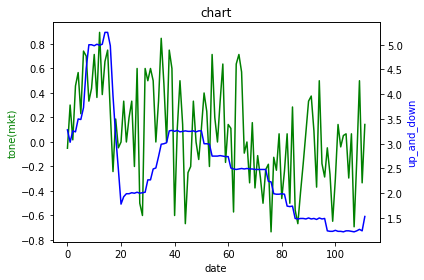

In [37]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  #보조축 차트 만들기
ax1.set_xlabel('date')
ax1.set_ylabel('tone(mkt)', color='g')  #라인차트 컬러 지정

ax1.plot(tone_rate['tone_i'], 'g-')  #라인차트 형태 지정
ax2 = ax1.twinx()  #보조축을 위한 X축 공유 지정
ax2.plot(tone_rate['price'], 'b-')
ax2.set_ylabel('up_and_down', color='b')
plt.title('chart')

fig.tight_layout()
plt.show()

In [38]:
tone_rate[['tone_i','price']].corr()

,tone_i,price
tone_i,1.000000,0.448474
price,0.448474,1.000000
